In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
df = pd.read_excel('THE_Subject_Data.xlsx')

In [74]:
df

,THE Broad Areas,2018,2019,2020,2021,2022,2023
0,Arts and Humanities,301-400,301-400,301-400,201-250,201-250,251-300
1,Business and Economics,126-150,176-200,151-175,151-175,176-200,151-175
2,Clinical and Health,201-250,201-250,201-250,176-200,201-250,176-200
3,Computer Science,251-300,201-250,251-300,201-250,201-250,176-200
4,Education,NaN,151-175,NaN,201-250,201-250,126-150
5,Engineering,NaN,NaN,NaN,251-300,201-250,201-250
6,Law,NaN,NaN,NaN,NaN,NaN,NaN
7,Life Sciences,NaN,301-400,301-400,301-400,301-400,251-300
8,Physical Sciences,401-500,301-400,401-500,401-500,401-500,301-400
9,Psychology,NaN,251-300,251-300,201-250,251-300,151-175


In [75]:
df = pd.melt(df, id_vars=['THE Broad Areas'], value_vars=[2018,2019,2020,2021,2022,2023], var_name='myVarname', value_name='myValname')

In [76]:
rank = (df.myValname.str.split('-').str[0].astype(float) + df.myValname.str.split('-').str[1].astype(float)) /2

In [77]:
df['rank'] = rank

In [78]:
df = df.rename(columns={"THE Broad Areas": "THE Area"})

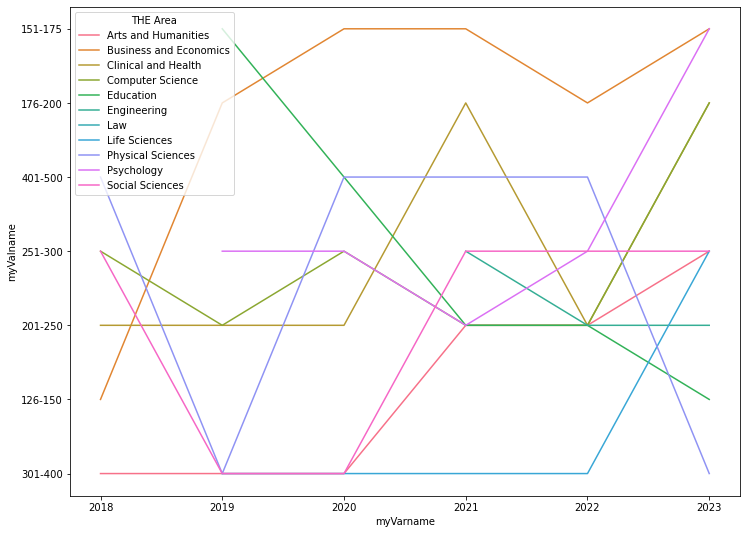

In [79]:
plt.figure(figsize=(12,9))
g = sns.lineplot(data=df, x='myVarname', y='myValname', hue='THE Area')
g.invert_yaxis()

In [82]:
df = df.rename(columns={"rank": "Rank", "myVarname":"Year"})

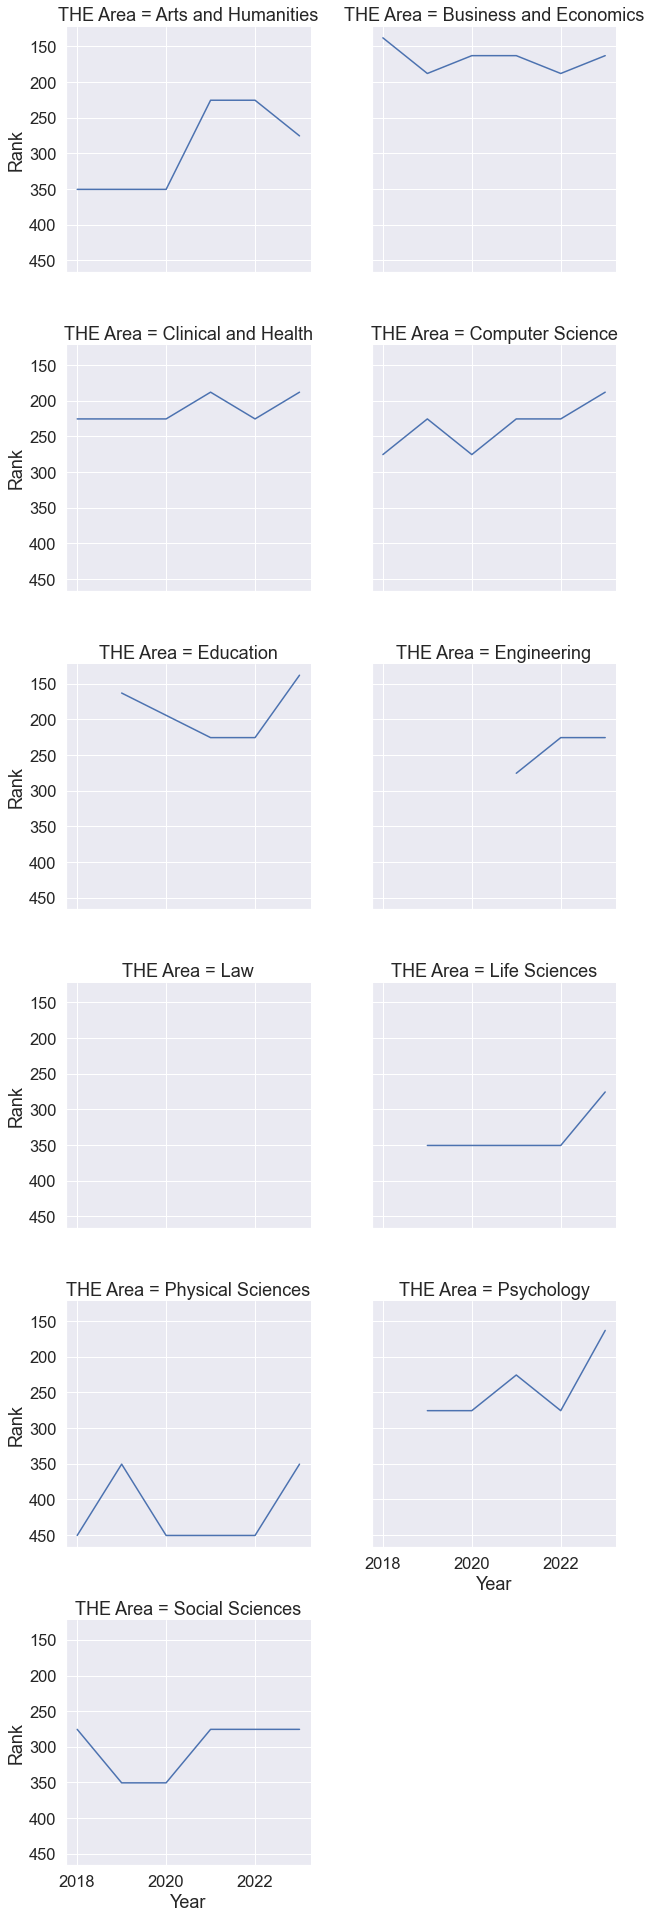

In [129]:
sns.set(font_scale=1.5)
#plt.figure(figsize=(15,9))
g = sns.FacetGrid(df, col='THE Area', col_wrap=2, height=4.5)
g.map(sns.lineplot,'Year','Rank')
for ax in g.axes.ravel():
    ax.invert_yaxis()
plt.subplots_adjust(hspace=0.3, wspace=0.25) 
plt.xlabel('Year')
plt.ylabel('Rank')
plt.savefig('subjects_2023.png')